In [1]:
import ROOT
import os
import sys
import numpy as np
from datetime import datetime as dt
sys.path.insert(0, os.environ.get('PROJDIR_RATEANA'))
import Modules.dtOperations as DTO
import Modules.querySQL as QSQL
from IPython.display import Image as Plot
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

#Good res
g_xres = 1000
g_yres = 500
        
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset);
ROOT.gStyle.SetPalette(ROOT.kRainBow);
ROOT.gStyle.SetOptStat(0)
outDir = 'Plots/'
extension = '.png'

options = np.genfromtxt("Data/options.dat",delimiter="\t",names=True,dtype=None)
inputPath = np.genfromtxt("Data/outList.dat",delimiter=" ",dtype=None)
varName = np.genfromtxt("channelNames.dat",delimiter=" ",dtype=None)

startTime = DTO.GetChicagoTimestampDT(dt.strptime(str(options['StartTime']),"%Y-%m-%d %H:%M:%S"))
endTime = DTO.GetChicagoTimestampDT(dt.strptime(str(options['EndTime']),"%Y-%m-%d %H:%M:%S"))
stepSize = options['StepSize']
nSteps = (endTime - startTime)/stepSize

# Extract data
data = [0]*len(varName)
h = [0]*len(varName)
for i in range(len(varName)):
    data[i] = np.genfromtxt(inputPath[i],delimiter=" ",names=True,dtype=None)

# Number of datapoints saved on the archiver per minute (day average)

Mainly HV variables here

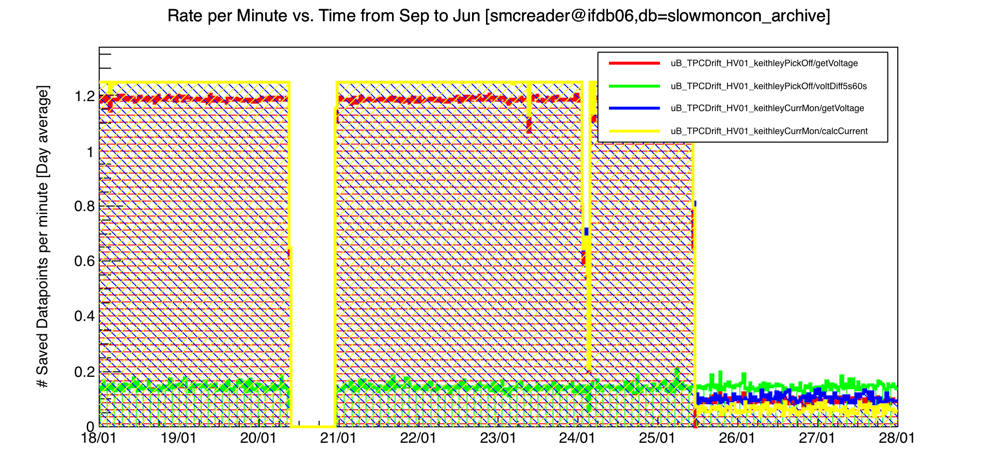

In [7]:
# Setup
perRate = 24*60 # As in number per hour, per minute or per second
fillStyle = [3305,3395,3345,3354]

plotName = 'hHvRate'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
c2 = ROOT.TCanvas(plotName+str(2),"",g_xres,g_yres)
ROOT.gStyle.SetHatchesSpacing(0.8)
ROOT.gStyle.SetHatchesLineWidth(1)

# Find max
tmax = []
for row in data:
    tmax.append(max(row['Rate']))
fmax = max(tmax)/perRate

# Plot
for i in range(4):
    h[i] = ROOT.TH1D("h"+str(i),"Rate per Minute vs. Time from Sep to Jun [smcreader@ifdb06,db=slowmoncon_archive];;# Saved Datapoints per minute [Day average]",nSteps,startTime,endTime)
    h[i].GetXaxis().SetTimeDisplay(1)
    h[i].GetYaxis().SetRangeUser(0,fmax*1.1)
    h[i].GetYaxis().CenterTitle()
    h[i].SetLineColor(i+2)
    h[i].SetFillColor(i+2)
    h[i].SetLineWidth(3)
    h[i].SetFillStyle(fillStyle[i])

    for j in range(len(data[i])):
        h[i].SetBinContent(h[i].FindBin(data[i]['Timestamp'][j]),data[i]['Rate'][j]/perRate)

c1.cd()
leg = ROOT.TLegend(0.6,0.7,0.89,0.89)    
h[0].Draw("F2")
for i in range(4):
    h[i].Draw("SAME")
    leg.AddEntry(h[i],varName[i],"l")
leg.Draw()
c1.SaveAs(outDir+plotName+extension)

c2.Divide(2,2)
for i in range(4):
    c2.cd(i+1)
    h[i].Draw("SAME")
c2.SaveAs(outDir+plotName+str(2)+extension)

# Finalize
destruct(c1)
destruct(c2)
for i in range(4):
    destruct(h[i])
Plot(outDir+plotName+extension)

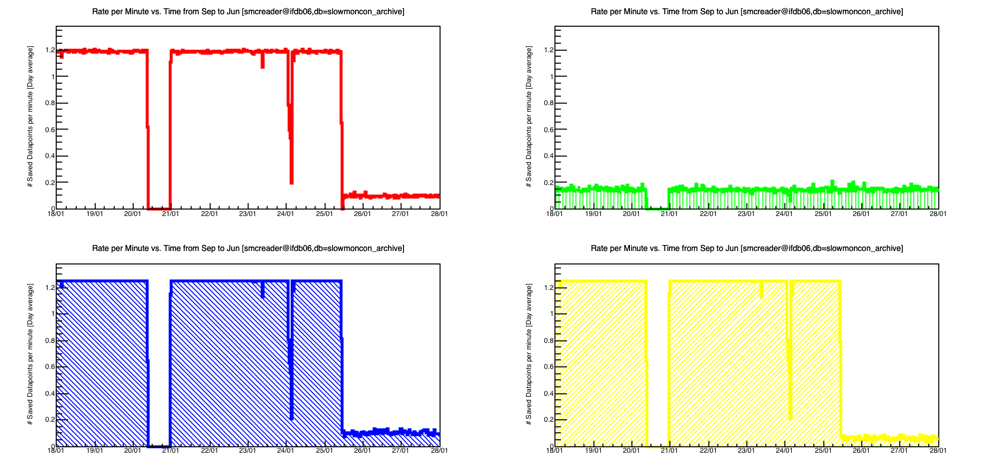

In [8]:
Plot(outDir+plotName+str(2)+extension)

# Periodicity for datapoints saved on the archiver, in seconds (day average)

Mainly HV variables here

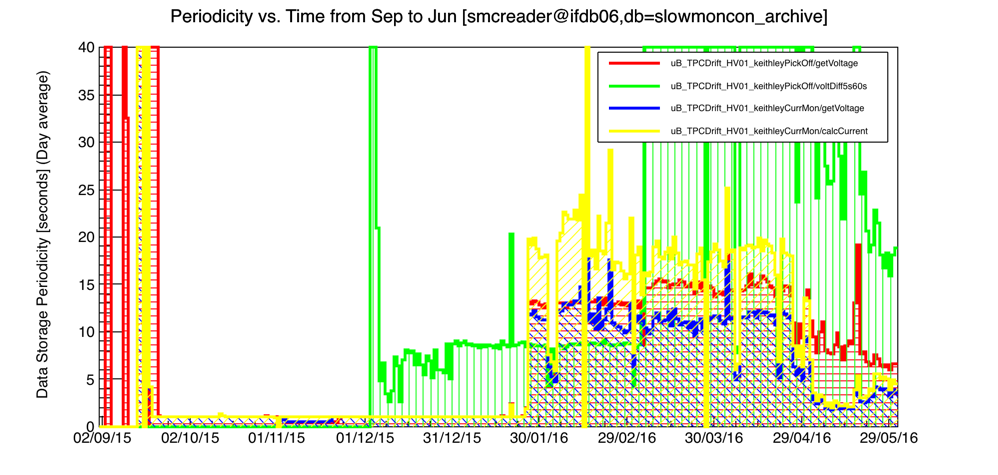

In [18]:
# Setup
perRate = 24*60*60 # As in number per hour, per minute or per second
fillStyle = [3305,3395,3345,3354]

plotName = 'hHvFrequency'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
c2 = ROOT.TCanvas(plotName+str(2),"",g_xres,g_yres)
ROOT.gStyle.SetHatchesSpacing(0.8)
ROOT.gStyle.SetHatchesLineWidth(1)

# Extract data
data = [0]*4
h = [0]*4
for i in range(4):
    data[i] = np.genfromtxt(inputPath[i],delimiter=" ",names=True,dtype=None)

# Find max
fmax = 40

# Plot
for i in range(4):
    h[i] = ROOT.TH1D("h"+str(i),"Periodicity vs. Time from Sep to Jun [smcreader@ifdb06,db=slowmoncon_archive];; Data Storage Periodicity [seconds] (Day average)",nSteps,startTime,endTime)
    h[i].GetXaxis().SetTimeDisplay(1)
    h[i].GetYaxis().SetRangeUser(0,fmax)
    h[i].GetYaxis().CenterTitle()
    h[i].SetLineColor(i+2)
    h[i].SetFillColor(i+2)
    h[i].SetLineWidth(3)
    h[i].SetFillStyle(fillStyle[i])

    for j in range(len(data[i])):
        if data[i]['Rate'][j]!=0:
            h[i].SetBinContent(h[i].FindBin(data[i]['Timestamp'][j]), perRate/float(data[i]['Rate'][j]))
c1.cd()
leg = ROOT.TLegend(0.6,0.7,0.89,0.89)    
h[0].Draw("F2")
for i in range(4):
    h[i].Draw("SAME")
    leg.AddEntry(h[i],varName[i],"l")
leg.Draw()
c1.SaveAs(outDir+plotName+extension)

c2.Divide(2,2)
for i in range(4):
    c2.cd(i+1)
    h[i].Draw("")
c2.SaveAs(outDir+plotName+str(2)+extension)

# Finalize
destruct(c1)
destruct(c2)
for i in range(4):
    destruct(h[i])
Plot(outDir+plotName+extension)

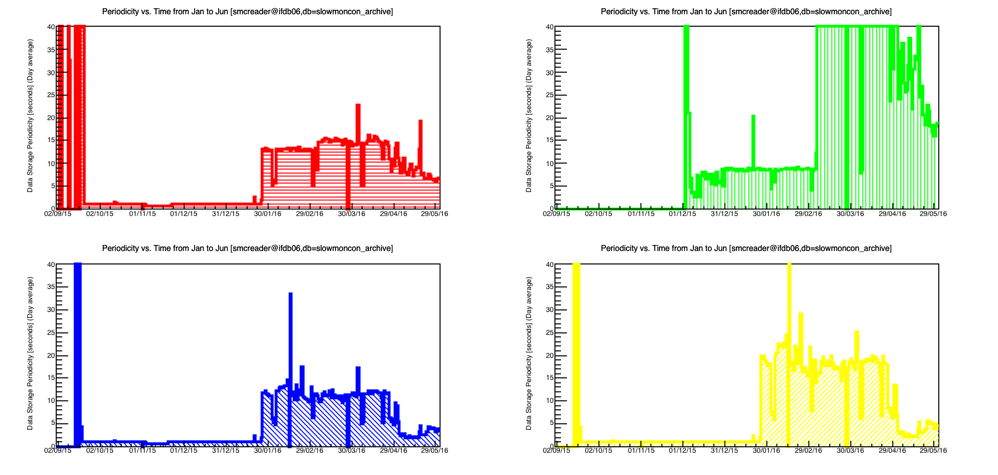

In [15]:
Plot(outDir+plotName+str(2)+extension)

# Number of datapoints saved on the archiver per minute (day average)

Other not-HV variables here

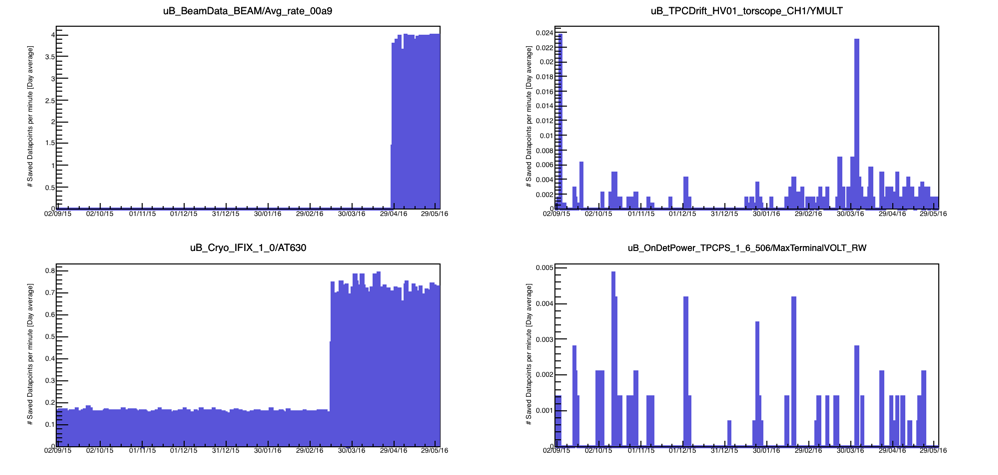

In [8]:
# Setup
perRate = 24*60 # As in number per hour, per minute or per second

plotName = 'hNotHvRate'
c1 = ROOT.TCanvas(plotName,"",g_xres,g_yres)
c2 = ROOT.TCanvas(plotName+str(2),"",g_xres,g_yres)
c3 = ROOT.TCanvas(plotName+str(3),"",g_xres,g_yres)

# Find max
tmax = []
for row in data:
    tmax.append(max(row['Rate']))
fmax = max(tmax)/perRate

# Plot
for i in range(4,len(varName)):
    h[i] = ROOT.TH1D("h"+str(i),varName[i]+";;# Saved Datapoints per minute [Day average]",nSteps,startTime,endTime)
    h[i].GetXaxis().SetTimeDisplay(1)
#     h[i].GetYaxis().SetRangeUser(0,fmax*1.1)
    h[i].GetYaxis().CenterTitle()
    h[i].SetLineColor(9)
    h[i].SetFillColor(9)
    h[i].SetLineWidth(3)

    for j in range(len(data[i])):
        h[i].SetBinContent(h[i].FindBin(data[i]['Timestamp'][j]),data[i]['Rate'][j]/perRate)

c1.Divide(2,2)
for i in range(4,8):
    c1.cd(i-3)
    h[i].Draw("SAME")
c1.SaveAs(outDir+plotName+extension)

c2.Divide(2,2)
for i in range(8,12):
    c2.cd(i-7)
    h[i].Draw("SAME")
c2.SaveAs(outDir+plotName+str(2)+extension)

c3.Divide(2,2)
for i in range(12,16):
    c3.cd(i-11)
    h[i].Draw("SAME")
c3.SaveAs(outDir+plotName+str(3)+extension)

# Finalize
destruct(c1)
destruct(c2)
destruct(c3)
for i in range(4,len(varName)):
    destruct(h[i])
Plot(outDir+plotName+extension)

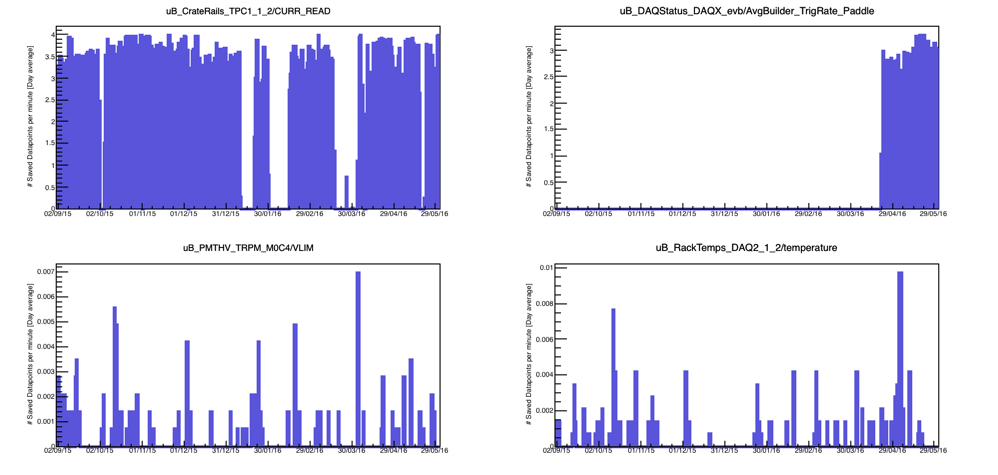

In [9]:
Plot(outDir+plotName+str(2)+extension)

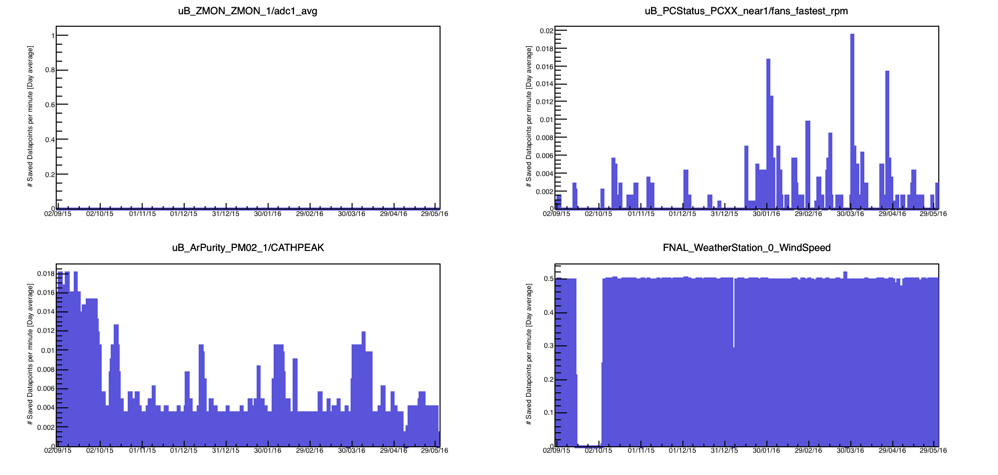

In [10]:
Plot(outDir+plotName+str(3)+extension)